# Converting depth images to point clouds using open3d
This notebook is the visual equivalent of the script `scripts/example.py`. 
Check the readme for more details.

In [153]:
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

from pointcloud_tools import PointCloudCreator #, create_pcd_from_array, read_pcd, write_pcd

In [154]:
# point to the data dir
current_folder = Path(".").resolve()
base_dir = current_folder.parent / "data"

## Demo images
A single example of a tomato depth image is included. 

In [155]:
# point to the image files
image = "B_93dd57ad"            #A_1a111b40 B_0328ab97 B_93dd57ad  D_b14ffae7

rgb_file = base_dir / "rgb" / f"{image}.png"
depth_file = base_dir / "depth" / f"{image}_depth.png"

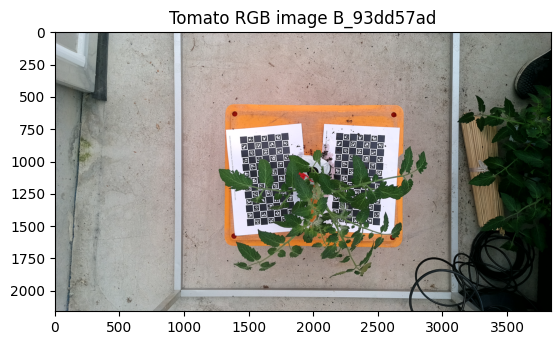

In [156]:
rgb_img = cv2.cvtColor(cv2.imread(str(rgb_file)), cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.title(f"Tomato RGB image {image}")
plt.show()

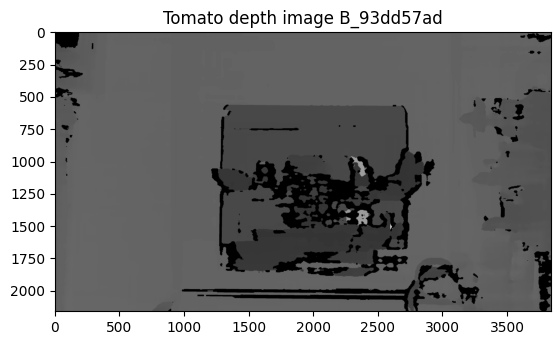

In [157]:
# The depth image is provided by the camera, and is a reconstruction from stero infra-red imaging.
depth_img = cv2.imread(str(depth_file), cv2.IMREAD_UNCHANGED)
plt.imshow(depth_img, cmap='gray')
plt.title(f"Tomato depth image {image}")
plt.show()

# Now we create a point cloud object

In [158]:
# init a point cloud creator with the camera configuration
point_cloud_creator = PointCloudCreator(conf_file=base_dir / "oak-d-s2-poe_conf.json", logger_level=100)

# create pcd object
pcd_object = point_cloud_creator.convert_depth_to_pcd(rgb_file=rgb_file, depth_file=depth_file)

## Quick visualization to validate the output.
More advanced visualization tools from open3d are available: 

https://www.open3d.org/docs/latest/tutorial/Basic/jupyter.html

Or use one of the many point cloud viewers.

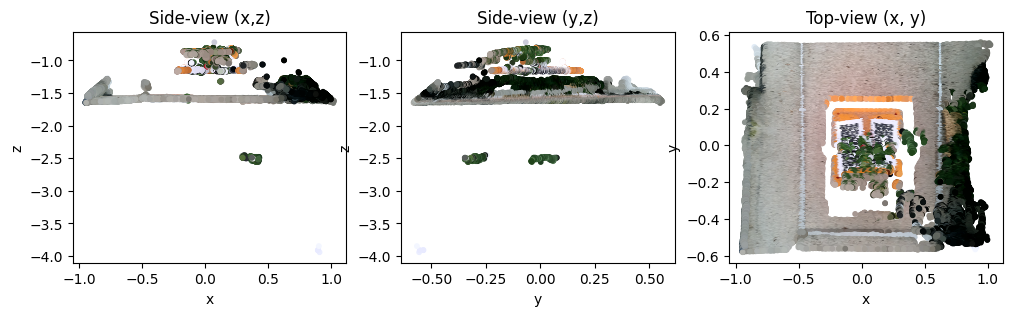

[[0.88627451 0.9254902  0.96470588]
 [0.65098039 0.67843137 0.67843137]
 [0.16862745 0.21176471 0.21568627]
 ...
 [0.         0.01568627 0.01568627]
 [0.05882353 0.06666667 0.05490196]
 [0.         0.00784314 0.        ]]


In [159]:
# Extract points and colors
points = np.asarray(pcd_object.points)
colors = np.asarray(pcd_object.colors)

# downsample to make the plotting faster

# use -y because the pixel coordinates differs from the matrix coordinate system
# use -z because the camera is facing downwards
x = copy.deepcopy(points[range(0, len(points), 100), 0])
y = copy.deepcopy(-points[range(0, len(points), 100), 1])
z = copy.deepcopy(-points[range(0, len(points), 100), 2]) 
c = copy.deepcopy(colors[range(0, len(points), 100), :])

fig, axs = plt.subplots(ncols=3, figsize=(12, 3))

axs[0].scatter(x, z, c=c, s=10)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].set_title('Side-view (x,z)')

axs[1].scatter(y, z, c=c, s=10)
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].set_title('Side-view (y,z)')

axs[2].scatter(x, y, c=c, s=10)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Top-view (x, y)')

plt.show()

print(c)

In [160]:
height_limit = -0.75
ground_level = -1.04

# filter out the points that are below the ground level
mask = z > ground_level
#mask = z < height_limit

#points_filtered = points[mask]
x_ground_filtered = x[mask]
y_ground_filtered = y[mask]
z_ground_filtered = z[mask]
c_ground_filtered = c[mask]

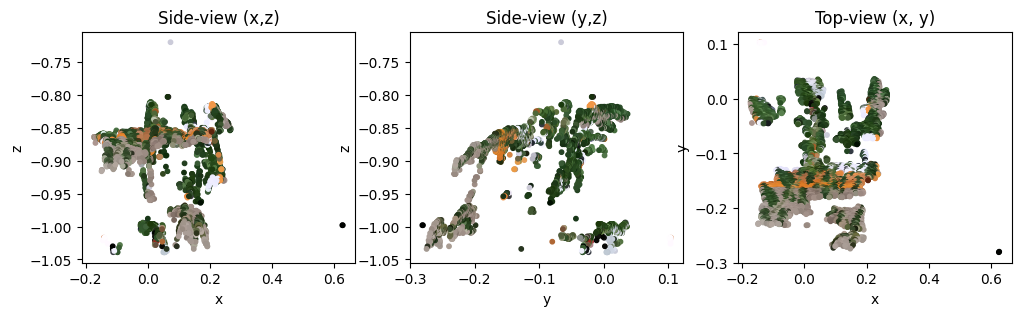

In [161]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3))

axs[0].scatter(x_ground_filtered, z_ground_filtered, c=c_ground_filtered, s=10)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].set_title('Side-view (x,z)')

axs[1].scatter(y_ground_filtered, z_ground_filtered, c=c_ground_filtered, s=10)
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].set_title('Side-view (y,z)')

axs[2].scatter(x_ground_filtered, y_ground_filtered, c=c_ground_filtered, s=10)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Top-view (x, y)')

plt.show()

In [162]:
print(np.min(c))
print(np.max(c))
print(c)

0.0
1.0
[[0.88627451 0.9254902  0.96470588]
 [0.65098039 0.67843137 0.67843137]
 [0.16862745 0.21176471 0.21568627]
 ...
 [0.         0.01568627 0.01568627]
 [0.05882353 0.06666667 0.05490196]
 [0.         0.00784314 0.        ]]


In [163]:
c_hsv = copy.deepcopy(c_ground_filtered)
c_rgb = copy.deepcopy(c_ground_filtered)


c_hsv[:, 0]= (c_hsv[:, 0] * 355)
c_hsv[:, 1]= (c_hsv[:, 1] * 100)
c_hsv[:, 2]= (c_hsv[:, 2] * 100)

c_rgb[:, 0]= (c_rgb[:, 0] * 255)
c_rgb[:, 1]= (c_rgb[:, 1] * 255)
c_rgb[:, 2]= (c_rgb[:, 2] * 255)

print(f"c original: {c}")
print("----------------------")

print(f"c_hsv: {c_hsv}")
print(f"c_hsv shape: {c_hsv.shape}")
print("----------------------")

print(f"c_rgb: {c_rgb}")
print(f"c_rgb shape: {c_rgb.shape}")




c original: [[0.88627451 0.9254902  0.96470588]
 [0.65098039 0.67843137 0.67843137]
 [0.16862745 0.21176471 0.21568627]
 ...
 [0.         0.01568627 0.01568627]
 [0.05882353 0.06666667 0.05490196]
 [0.         0.00784314 0.        ]]
----------------------
c_hsv: [[295.1372549   47.05882353  28.62745098]
 [355.         100.         100.        ]
 [355.          98.03921569 100.        ]
 ...
 [236.66666667  61.96078431  59.21568627]
 [  0.           0.78431373   0.        ]
 [  0.           0.78431373   0.        ]]
c_hsv shape: (4972, 3)
----------------------
c_rgb: [[212. 120.  73.]
 [255. 255. 255.]
 [255. 250. 255.]
 ...
 [170. 158. 151.]
 [  0.   2.   0.]
 [  0.   2.   0.]]
c_rgb shape: (4972, 3)


In [164]:
upper_green_hsv = np.array([180, 100, 100])
lower_green_hsv = np.array([90, 0, 0])

upper_green_rgb = np.array([50, 205, 50])
lower_green_rgb = np.array([0, 100, 0])

mask_green_low_hsv = copy.deepcopy((c_hsv > lower_green_hsv).all(axis=1))
mask_green_low_rgb = copy.deepcopy((c_rgb > lower_green_rgb).all(axis=1))

print(f"mask green low hsv: {mask_green_low_hsv}")
print(f"mask green low rgb: {mask_green_low_rgb}")

mask green low hsv: [ True  True  True ...  True False False]
mask green low rgb: [ True  True  True ...  True False False]


In [165]:
x_green_hsv = copy.deepcopy(x_ground_filtered[mask_green_low_hsv])
y_green_hsv = copy.deepcopy(y_ground_filtered[mask_green_low_hsv])
z_green_hsv = copy.deepcopy(z_ground_filtered[mask_green_low_hsv])
c_green_hsv = copy.deepcopy(c_ground_filtered[mask_green_low_hsv])

x_green_rgb = copy.deepcopy(x_ground_filtered[mask_green_low_rgb])
y_green_rgb = copy.deepcopy(y_ground_filtered[mask_green_low_rgb])
z_green_rgb = copy.deepcopy(z_ground_filtered[mask_green_low_rgb])
c_green_rgb = copy.deepcopy(c_ground_filtered[mask_green_low_rgb])

In [166]:
mask_green_up_hsv = (c_green_hsv < upper_green_hsv).all(axis=1)
mask_green_up_rgb = (c_green_rgb < upper_green_rgb).all(axis=1)

print(f"mask green up hsv: {mask_green_up_hsv}")
print(f"mask green up rgb: {mask_green_up_rgb}")

mask green up hsv: [ True  True  True ...  True  True  True]
mask green up rgb: [ True  True  True ...  True  True  True]


In [167]:
x_green_hsv = x_green_hsv[mask_green_up_hsv]
y_green_hsv = y_green_hsv[mask_green_up_hsv]
z_green_hsv = z_green_hsv[mask_green_up_hsv]
c_green_hsv = c_green_hsv[mask_green_up_hsv]

x_green_rgb = x_green_rgb[mask_green_up_rgb]
y_green_rgb = y_green_rgb[mask_green_up_rgb]
z_green_rgb = z_green_rgb[mask_green_up_rgb]
c_green_rgb = c_green_rgb[mask_green_up_rgb]

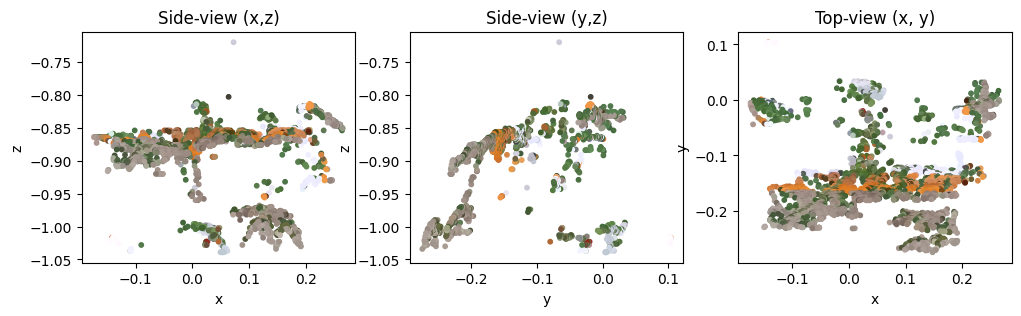

In [168]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3))

axs[0].scatter(x_green_hsv, z_green_hsv, c=c_green_hsv, s=10)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].set_title('Side-view (x,z)')

axs[1].scatter(y_green_hsv, z_green_hsv, c=c_green_hsv, s=10)
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].set_title('Side-view (y,z)')

axs[2].scatter(x_green_hsv, y_green_hsv, c=c_green_hsv, s=10)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Top-view (x, y)')

plt.show()

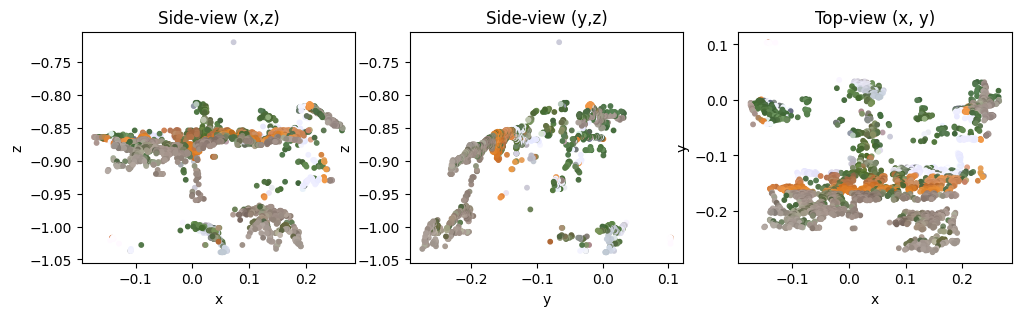

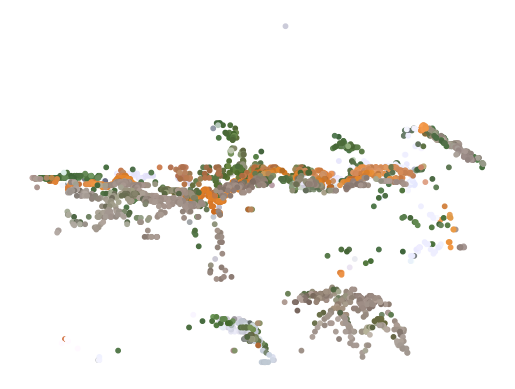

X-axis limits:  (-0.1951461557114792, 0.2871617360402037)
Z-axis limits:  (-1.0549500346183778, -0.7040500283241272)
Z-axis span:  0.35090000629425055


In [169]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3))

axs[0].scatter(x_green_rgb, z_green_rgb, c=c_green_rgb, s=10)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].set_title('Side-view (x,z)')


# Get the limits of the x and y axes
x_limits = axs[0].get_xlim()
z_limits = axs[0].get_ylim()
z_span = z_limits[1] - z_limits[0]

axs[1].scatter(y_green_rgb, z_green_rgb, c=c_green_rgb, s=10)
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].set_title('Side-view (y,z)')

axs[2].scatter(x_green_rgb, y_green_rgb, c=c_green_rgb, s=10)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Top-view (x, y)')
plt.show()

plt.scatter(x_green_rgb, z_green_rgb, c=c_green_rgb, s=10)
plt.axis('off')
plt.savefig('test_image.png', bbox_inches='tight', pad_inches=0)
plt.show()


# Print the limits
print("X-axis limits: ", x_limits)
print("Z-axis limits: ", z_limits)
print("Z-axis span: ", z_span)

In [170]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

In [171]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """

    background = img_in < thres
    foreground = img_in > thres

    mask = img_in > thres

    return img_as_ubyte(mask)

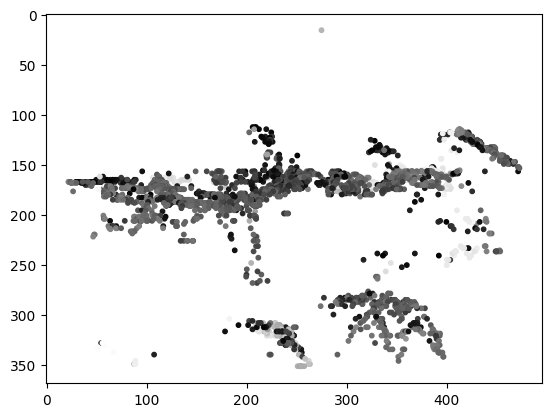

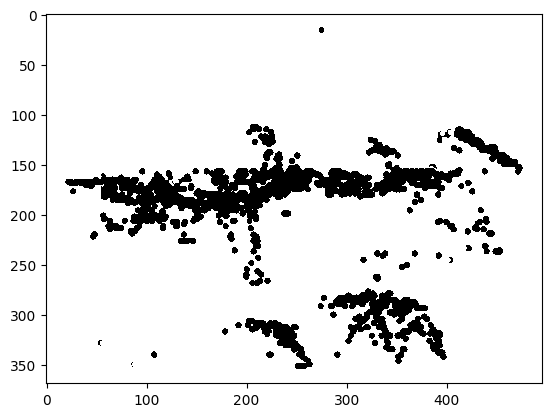

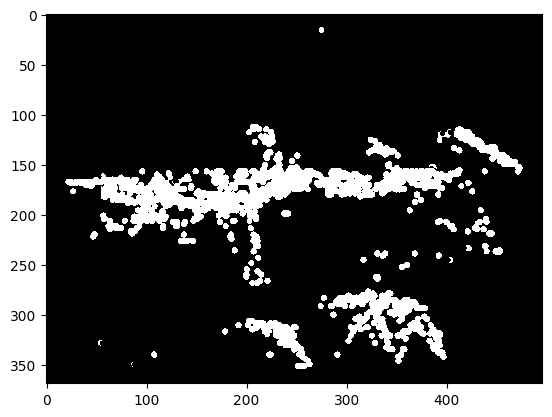

In [172]:
import cv2
import numpy as np
img = cv2.imread('test_image.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()


img_thres1 = threshold_image(gray_img, 230)
plt.imshow(img_thres1, cmap='gray')
plt.show()

swapped_img = np.where(img_thres1 == 0, 255, 0)
plt.imshow(swapped_img, cmap='gray')
plt.show()

Max X: 368
Min X: 0
Max Y: 354
Min Y: 110
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


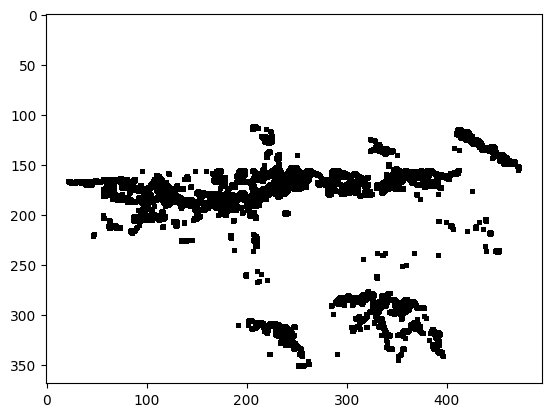

In [173]:
import numpy as np
import numpy as np
kernel = np.ones((5, 5), np.uint8)  # define the kernel size for opening
closed_img = cv2.morphologyEx(img_thres1, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed_img, cmap='gray')

img_max = np.max(np.where(closed_img == 255)[0])
img_min = np.min(np.where(closed_img == 255)[0])
print("Max X:", img_max)
print("Min X:", img_min)

max_y = np.max(np.where(closed_img == 0)[0])
min_y = np.min(np.where(closed_img == 0)[0])
plant_pixel = max_y - min_y

print("Max Y:", max_y)
print("Min Y:", min_y)

print(closed_img)


In [174]:
pixel_in_cm = z_span / img_max
print("Pixel in cm:", pixel_in_cm)

plant_height = plant_pixel * pixel_in_cm
print("Plant height:", plant_height)

Pixel in cm: 0.0009535326257995939
Plant height: 0.2326619606951009
